In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('OrdinalDrop2.csv')
ordinal.shape

(2578, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2578, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9901397869947245

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9901397869947245

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9901397869947245

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9900169682745308

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9900169682745308

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6b0e82970>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9900169682745308

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.15940785, 4.12073922, 4.1198349 , 4.12898803, 4.23451304]),
 'score_time': array([0.00349307, 0.00350285, 0.00347209, 0.0054481 , 0.00346398]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b80af0>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b80700>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.33887482, 5.24636221, 5.24074388, 5.23913884, 5.23877883]),
 'score_time': array([0.00345588, 0.00339794, 0.00573611, 0.0034461 , 0.00338697]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b80ee0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0ba7d00>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.27291584, 5.30378103, 5.23111987, 5.21715283, 5.22929502]),
 'score_time': array([0.00343919, 0.00572491, 0.00343204, 0.00378799, 0.00478697]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6d1b2fc10>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd702ad0b80>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.33153009, 5.22543788, 5.4532342 , 5.33171988, 5.24692512]),
 'score_time': array([0.00337481, 0.00485611, 0.00354576, 0.00341511, 0.00346494]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b98490>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b74070>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6d1b87340>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.2728889 , 5.22531199, 5.23075771, 5.25293589, 5.24836707]),
 'score_time': array([0.00342226, 0.00342298, 0.00341892, 0.00472498, 0.00339007]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd702aa8100>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b7f970>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0b8f640>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.33326411, 5.35987616, 5.522053  , 5.33766198, 5.32590508]),
 'score_time': array([0.00343776, 0.00445294, 0.00358391, 0.00346494, 0.00488186]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6d1b2fc40>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6f0ba7760>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd6d1b2ffd0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,8.757968,0.018961,0.931945
1,8.796232,0.022059,0.938533
2,8.683625,0.021269,0.947346
3,8.759640,0.020424,0.918753
4,8.805165,0.017802,0.944991
5,5.118361,0.006121,0.934845
6,8.891394,0.009422,0.941550
7,4.842735,0.006747,0.933222
8,4.286175,0.006395,0.945822
9,4.314696,0.004412,0.942002


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.931945
1,0.938533
2,0.947346
3,0.918753
4,0.944991
5,0.934845
6,0.941550
7,0.933222
8,0.945822
9,0.942002


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.931547,0.002251,0.914243
1,0.904657,0.002377,0.923267
2,0.922721,0.003058,0.930881
3,0.918878,0.002400,0.897713
4,0.917462,0.002338,0.939440
5,0.940958,0.002483,0.912199
6,0.935299,0.002229,0.932387
7,0.938147,0.002259,0.922119
8,0.872888,0.002208,0.943442
9,0.885202,0.002756,0.916864


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.914243
1,0.923267
2,0.930881
3,0.897713
4,0.939440
5,0.912199
6,0.932387
7,0.922119
8,0.943442
9,0.916864


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,12.420486,0.020031,0.928059
1,12.718772,0.006142,0.940267
2,12.647992,0.006731,0.940669
3,12.632453,0.013954,0.916298
4,10.035650,0.010448,0.945595
5,12.481615,0.018808,0.925667
6,12.532710,0.010696,0.940447
7,12.668459,0.006516,0.931273
8,9.681844,0.007024,0.941838
9,9.899159,0.004733,0.937244


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.928059
1,0.940267
2,0.940669
3,0.916298
4,0.945595
5,0.925667
6,0.940447
7,0.931273
8,0.941838
9,0.937244


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,10.648027,0.011304,0.928059
1,10.758217,0.007871,0.940267
2,10.785839,0.009566,0.940669
3,10.593250,0.008400,0.916298
4,10.676088,0.012101,0.945595
5,10.533693,0.009537,0.925667
6,10.978760,0.010296,0.940447
7,13.450586,0.007020,0.931273
8,11.119083,0.006731,0.941838
9,11.110003,0.005782,0.937244


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.928059
1,0.940267
2,0.940669
3,0.916298
4,0.945595
5,0.925667
6,0.940447
7,0.931273
8,0.941838
9,0.937244


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,10.211183,0.009438,0.928059
1,10.445739,0.009239,0.940267
2,13.888917,0.011551,0.940669
3,10.058373,0.006177,0.916298
4,10.320239,0.009668,0.945595
5,13.948016,0.007241,0.925667
6,10.231927,0.009566,0.940447
7,10.159061,0.010047,0.931273
8,10.590777,0.008800,0.941838
9,11.681708,0.003962,0.937244


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.928059
1,0.940267
2,0.940669
3,0.916298
4,0.945595
5,0.925667
6,0.940447
7,0.931273
8,0.941838
9,0.937244


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,13.142079,0.008769,0.931787
1,10.617792,0.015038,0.937868
2,10.580151,0.016732,0.946176
3,10.750983,0.006351,0.915209
4,13.127348,0.006894,0.947324
5,10.709225,0.011734,0.927594
6,10.783259,0.018809,0.942651
7,10.621937,0.008770,0.935038
8,10.388166,0.007979,0.942140
9,10.582061,0.005588,0.939463


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.931787
1,0.937868
2,0.946176
3,0.915209
4,0.947324
5,0.927594
6,0.942651
7,0.935038
8,0.942140
9,0.939463


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,12.136616,0.007903,0.931787
1,11.859483,0.009088,0.937868
2,11.948844,0.015802,0.946176
3,11.815412,0.011651,0.915209
4,11.862231,0.013771,0.947324
5,11.809434,0.011152,0.927594
6,12.034329,0.008929,0.942651
7,11.892549,0.014300,0.935038
8,10.523292,0.014540,0.942140
9,11.550129,0.004734,0.939463


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.931787
1,0.937868
2,0.946176
3,0.915209
4,0.947324
5,0.927594
6,0.942651
7,0.935038
8,0.942140
9,0.939463


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,12.174915,0.012652,0.931787
1,12.404796,0.024596,0.937868
2,12.257778,0.018894,0.946176
3,12.557175,0.026225,0.915209
4,12.464210,0.010037,0.947324
5,12.324783,0.009156,0.927594
6,12.860956,0.007846,0.942651
7,12.617952,0.007532,0.935038
8,10.942884,0.005593,0.942140
9,10.158213,0.004304,0.939463


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.931787
1,0.937868
2,0.946176
3,0.915209
4,0.947324
5,0.927594
6,0.942651
7,0.935038
8,0.942140
9,0.939463


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.931945,0.914243,0.928059,0.928059,0.928059,0.931787,0.931787,0.931787
1,0.938533,0.923267,0.940267,0.940267,0.940267,0.937868,0.937868,0.937868
2,0.947346,0.930881,0.940669,0.940669,0.940669,0.946176,0.946176,0.946176
3,0.918753,0.897713,0.916298,0.916298,0.916298,0.915209,0.915209,0.915209
4,0.944991,0.939440,0.945595,0.945595,0.945595,0.947324,0.947324,0.947324
5,0.934845,0.912199,0.925667,0.925667,0.925667,0.927594,0.927594,0.927594
6,0.941550,0.932387,0.940447,0.940447,0.940447,0.942651,0.942651,0.942651
7,0.933222,0.922119,0.931273,0.931273,0.931273,0.935038,0.935038,0.935038
8,0.945822,0.943442,0.941838,0.941838,0.941838,0.942140,0.942140,0.942140
9,0.942002,0.916864,0.937244,0.937244,0.937244,0.939463,0.939463,0.939463


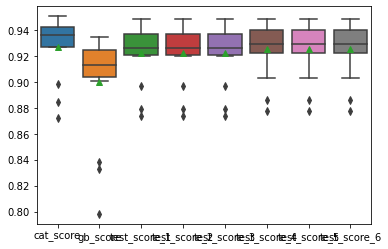

In [72]:
sns.boxplot(data=combo, showmeans=True);

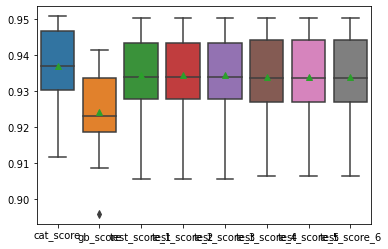

In [71]:
sns.boxplot(data=combo, showmeans=True);

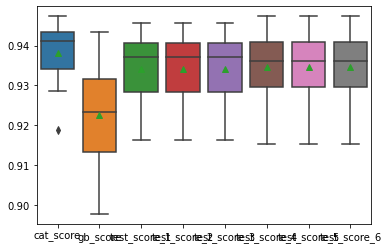

In [71]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220


In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.938227,0.922535,0.934212,0.934212,0.934212,0.934618,0.934618,0.934618
std,0.007841,0.013025,0.008465,0.008465,0.008465,0.009223,0.009223,0.009223
min,0.918753,0.897713,0.916298,0.916298,0.916298,0.915209,0.915209,0.915209
25%,0.934034,0.913221,0.928448,0.928448,0.928448,0.929690,0.929690,0.929690
50%,0.941039,0.923267,0.937244,0.937244,0.937244,0.936096,0.936096,0.936096
75%,0.943497,0.931634,0.940558,0.940558,0.940558,0.940802,0.940802,0.940802
max,0.947346,0.943442,0.945595,0.945595,0.945595,0.947324,0.947324,0.947324
